- 目的：看一下检测到的异常点在原始数据中有哪些异常特征表现
- 顺便和正常值的一些指标做对比

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np


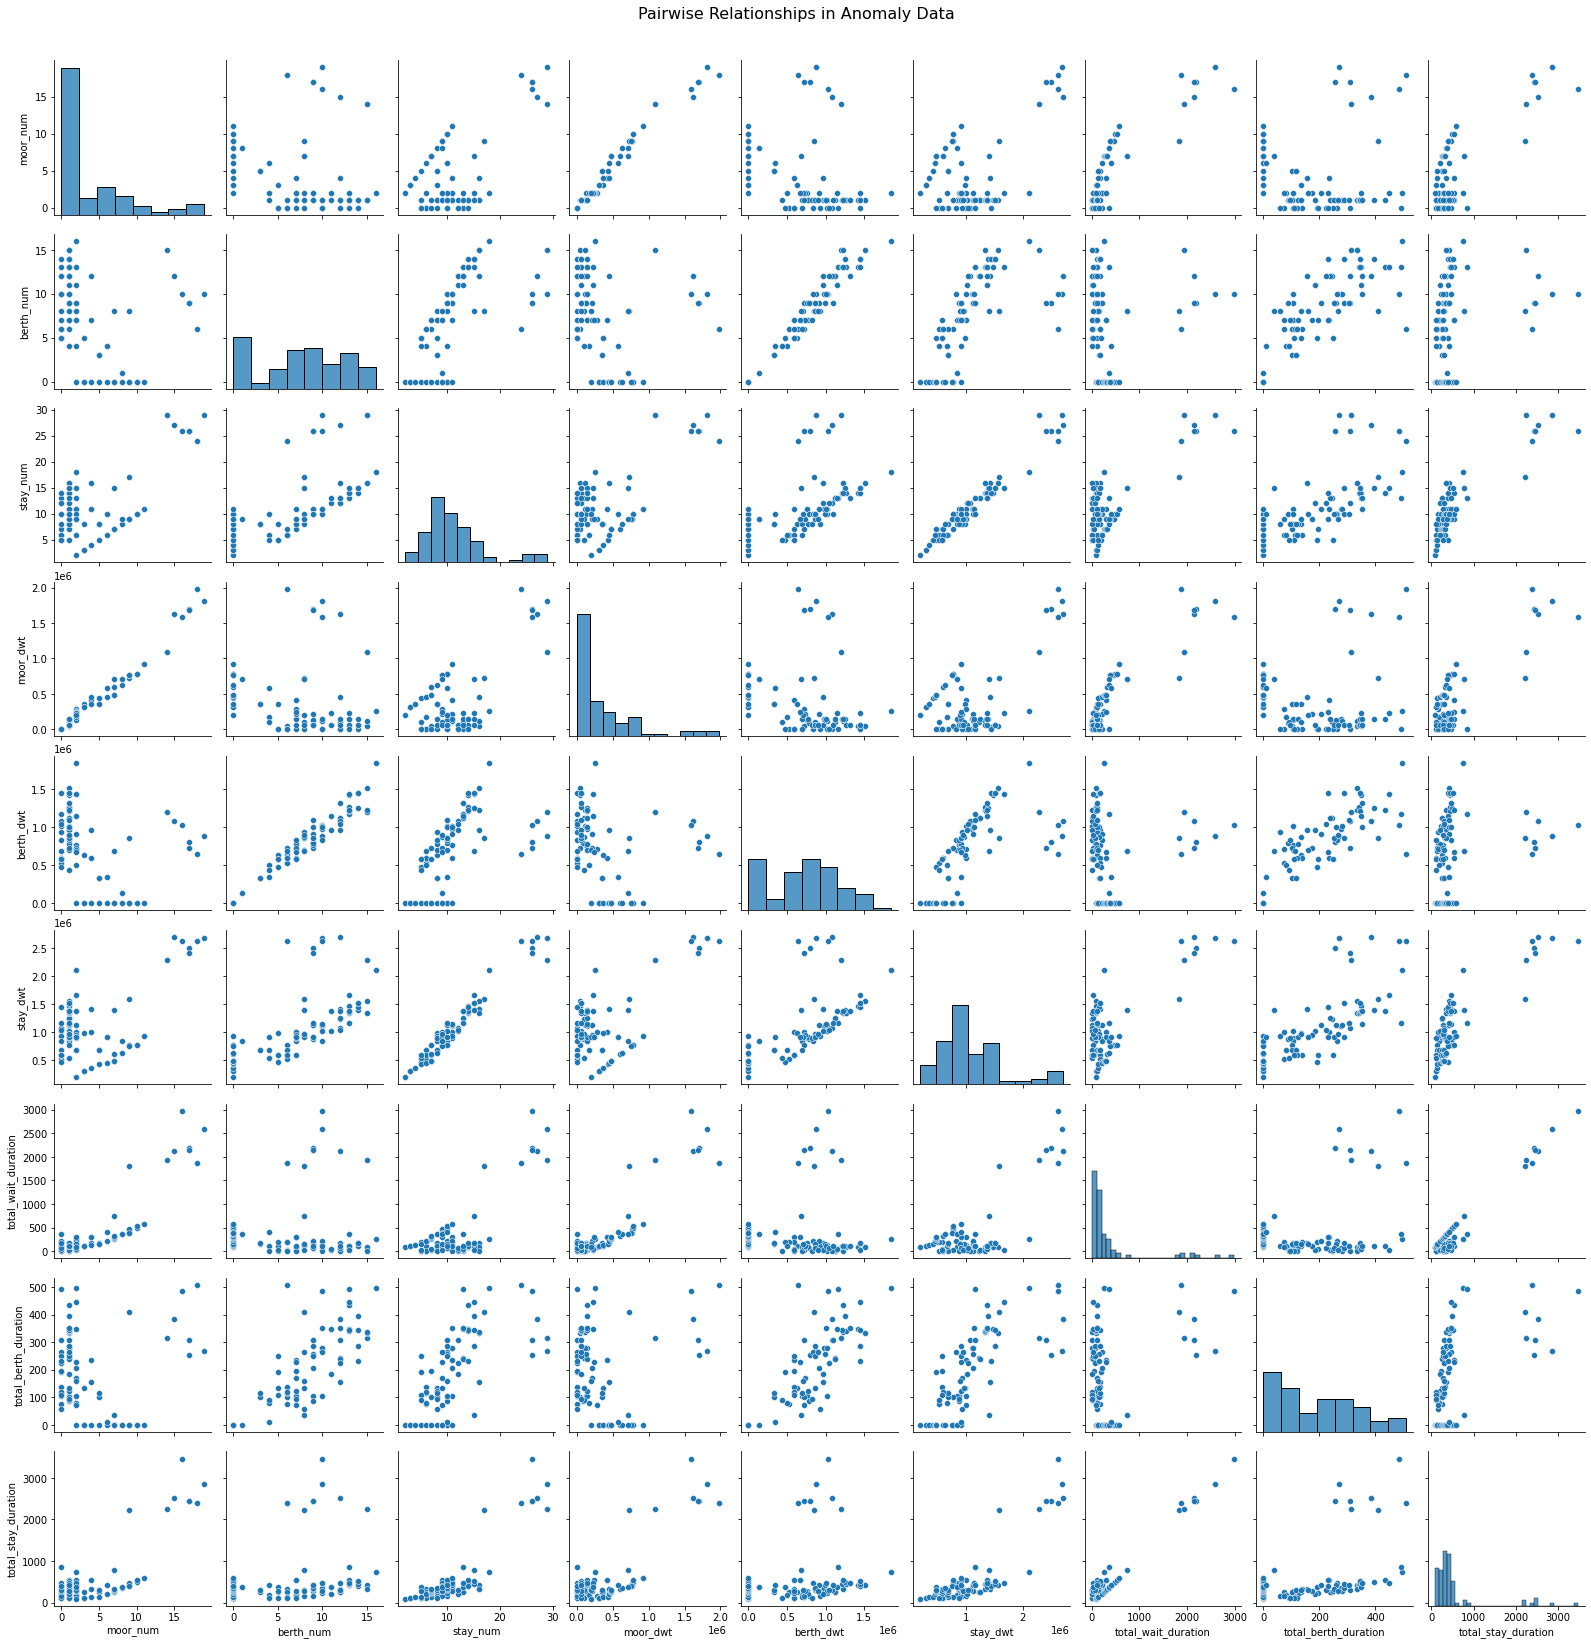

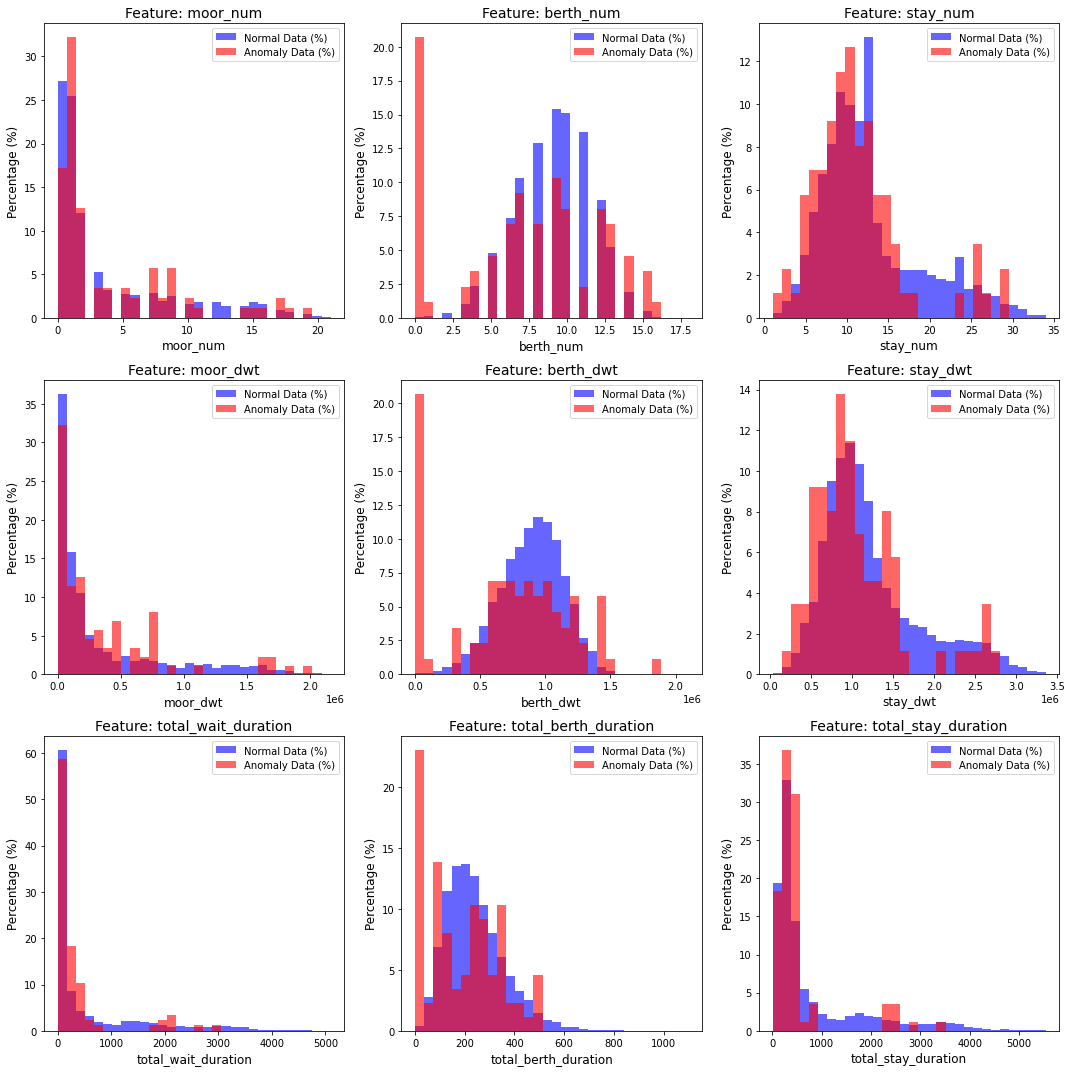

In [ ]:
data = pd.read_csv("data/NewYork_port/NewYork_port_data_2020_2024.csv", parse_dates=["summary_time"], index_col="summary_time")
with open("experiment/new_york_port/full_dataset_anomaly_timestamps.json", "r") as f:
    anomalies = json.load(f)["anomaly_timestamps"]

anomalies = pd.to_datetime(anomalies)
anomaly_data = data.loc[anomalies]

data_without_time = data.reset_index(drop=True)
anomaly_data_without_time = anomaly_data.reset_index(drop=True)

# Pairwise plot for anomaly data
sns.pairplot(anomaly_data_without_time)
plt.suptitle("Pairwise Relationships in Anomaly Data", y=1.02, fontsize=16)
plt.show()

normal_data = data.drop(anomalies, errors="ignore")
normal_data_without_time = normal_data.reset_index(drop=True)

n_features = anomaly_data_without_time.shape[1]
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(anomaly_data_without_time.columns):
    ax = axes[i]

    normal_counts, bins = np.histogram(normal_data_without_time[col], bins=30)
    anomaly_counts, _ = np.histogram(anomaly_data_without_time[col], bins=bins)
    
    normal_percentages = normal_counts / normal_counts.sum() * 100
    anomaly_percentages = anomaly_counts / anomaly_counts.sum() * 100

    # Plot bar plots for percentages
    bin_centers = (bins[:-1] + bins[1:]) / 2
    ax.bar(bin_centers, normal_percentages, width=(bins[1] - bins[0]), alpha=0.6, label="Normal Data (%)", color="blue")
    ax.bar(bin_centers, anomaly_percentages, width=(bins[1] - bins[0]), alpha=0.6, label="Anomaly Data (%)", color="red")

    ax.set_title(f"Feature: {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
